# Merging Tables With Different Join Types
Take your knowledge of joins to the next level. In this chapter, you’ll work with TMDb movie data as you learn about left, right, and outer joins. You’ll also discover how to merge a table to itself and merge on a DataFrame index.

## Counting missing rows with left join

The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

The `movies` and `financials` tables have been loaded for you.

In [1]:
import pandas as pd
import numpy as np
movies = pd.read_pickle('datasets/movies.p')
financials = pd.read_pickle('datasets/financials.p')

### Instructions 1/3
What column is likely the best column to merge the two tables on?

In [2]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [3]:
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


### Instructions 2/3
Merge the `movies` table, as the left table, with the `financials` table using a left join, and save the result to `movies_financials`.

In [4]:
movies_financials = movies.merge(financials, on = 'id', how = 'left')
movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


### Instructions 3/3
Count the number of rows in `movies_financials` with a `null` value in the `budget` column.

In [5]:
numbers_of_missing_fin = movies_financials['budget'].isna().sum()
# numbers_of_missing_fin = movies_financials['budget'].isnull().sum() # this is a similar code
numbers_of_missing_fin

1574

You used a left join to find out which rows in the `financials` table were missing data. When performing a left join, the `.merge()` method returns a row full of null values for columns in the right table if the key column does not have a matching value in both tables. We see that there are at least 1,500 rows missing data. Wow! That sounds like a lot of work.

## Enriching a dataset

Setting `how='left'` with the `.merge()` method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The `toy_story` DataFrame contains the Toy Story movies. The `toy_story` and `taglines` DataFrames have been loaded for you.

In [6]:
toy_story = pd.read_pickle('datasets/toy_story.p')
taglines = pd.read_pickle('datasets/taglines.p')

### Instructions
Merge `toy_story` and `taglines` on the id column with a left join, and save the result as `toystory_tag`.

In [7]:
toystory_tag = toy_story.merge(taglines, on = 'id', how = 'left')
toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73575118,1999-10-30,The toys are back!
2,862,Toy Story,73640445,1995-10-30,NaN


In [8]:
toystory_tag.shape

(3, 5)

### Instructions 2/2
With `toy_story` as the left table, merge to it `taglines` on the id column with an `inner join`, and save as `toystory_tag`.

In [9]:
toystory_tag = toy_story.merge(taglines, on = 'id')
toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73575118,1999-10-30,The toys are back!


In [10]:
toystory_tag.shape

(2, 5)

If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

## Right join to find unique movies

Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the `movies` table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The `movies`, `scifi_movies`, and `action_movies` tables have been loaded for you.

In [11]:
movies = pd.read_pickle('datasets/movies.p')
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


##### Prepare the `scifi_movies` and `action_movies` dataset from `movies_to_genre` dataset

In [58]:
# Import the movie_to_genres dataset
movie_to_genres = pd.read_pickle('datasets/movie_to_genres.p')
print(movie_to_genres.head())
print(movie_to_genres.shape)

   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure
(12160, 2)


In [13]:
# Subset scifi_movies dataset and store as separated pickle file
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']
scifi_movies.to_pickle('datasets/scifi_movies.p')

# Subset action_movies dataset and store as separated pickle file
action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action']
action_movies.to_pickle('datasets/action_movies.p')

### Instructions 1/4
Merge `action_movies` and `scifi_movies` tables with a right join on `movie_id`. Save the result as `action_scifi`.

In [14]:
print(action_movies.columns, scifi_movies.columns)

Index(['movie_id', 'genre'], dtype='object') Index(['movie_id', 'genre'], dtype='object')


In [15]:
action_scifi = action_movies.merge(scifi_movies, on = 'movie_id', how = 'right')
action_scifi.head(2)

,movie_id,genre_x,genre_y
0,11,Action,Science Fiction
1,18,Action,Science Fiction


### Instructions 2/4
Update the merge to add suffixes, where `'_act'` and `'_sci'` are suffixes for the left and right tables, respectively.

In [59]:
action_scifi = action_movies.merge(scifi_movies, on = 'movie_id', how = 'right', suffixes = ['_act','_sci'])
action_scifi.head(2)

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction


### Instructions 3/4
From `action_scifi`, subset only the rows where the `genre_act` column is null.

In [62]:
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only.head(2)

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction


In [64]:
scifi_only.shape

(258, 3)

### Instructions 4/4
Merge `movies` and `scifi_only` using the `id` column in the left table and the `movie_id` column in the right table with an inner join.

In [61]:
movies.shape

(4803, 3)

In [18]:
movies_and_scifi_only = movies.merge(scifi_only, left_on= 'id', right_on= 'movie_id')
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


In [19]:
movies_and_scifi_only.shape

(258, 7)

You found over 250 action only movies by merging action_movies and scifi_movies using a right join. With this, you were able to find the rows not found in the action_movies table. Additionally, you used the left_on and right_on arguments to merge in the movies table.

## Popular genres with right join

What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_to_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the `movie_to_genres` table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called `id`, and in `movies_to_genres` it's called `movie_id`.

### Preparation
We need to create the `pop_movies` mergin `movies` and `movie_to_genres`.

In [20]:
# First we check the movie dataset columns header
movies.columns

Index(['id', 'title', 'popularity', 'release_date'], dtype='object')

In [21]:
# The we do the same with movie_to_genre dataset
movie_to_genres.columns

Index(['movie_id', 'genre'], dtype='object')

In [22]:
# Then we generate a support DataSet merging the movie and movies_to_genre datasets on id and movie_id columns
movies_support = movies.merge(movie_to_genres, how ='inner', left_on= 'id', right_on= 'movie_id')
movies_support.head(2)

,id,title,popularity,release_date,movie_id,genre
0,257,Oliver Twist,20.415572,2005-09-23,257,Crime
1,257,Oliver Twist,20.415572,2005-09-23,257,Drama


In [23]:
# Now we can create the pop_movies datasets by subseting the movies_support dataset
pop_movies = movies_support[movies_support['popularity'] > 203.000000]\
[['id','title','popularity','release_date']]\
.drop_duplicates('id').sort_values('popularity', ascending = False)

In [24]:
pop_movies

,id,title,popularity,release_date
11502,211672,Minions,875.581305,2015-06-17
10954,157336,Interstellar,724.247784,2014-11-05
4978,293660,Deadpool,514.569956,2016-02-09
6130,118340,Guardians of the Galaxy,481.098624,2014-07-30
10641,76341,Mad Max: Fury Road,434.278564,2015-05-13
4731,135397,Jurassic World,418.708552,2015-06-09
11043,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
2795,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
10630,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
6612,177572,Big Hero 6,203.734590,2014-10-24


### Instructions
- Merge `movie_to_genres` and `pop_movies` using a right join. Save the results as `genres_movies`.
- Group `genres_movies` by `genre` and count the number of `id` values.

In [67]:
genres_movies = movie_to_genres.merge(pop_movies, how = 'right', left_on= 'movie_id', right_on= 'id')
genres_movies.head()

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


In [26]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

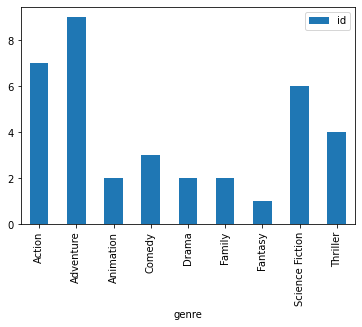

In [27]:
genre_counts = genres_movies.groupby('genre').agg({'id':'count'})
genre_counts.plot(kind = 'bar')
plt.show

The right join ensured that you were analyzing all of the pop_movies. You see from the results that adventure and action are the most popular genres

## Using outer join to select actors

One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called `iron_1_actors`, and Iron Man 2 table is called `iron_2_actors`. Both tables have been loaded for you and a few rows printed so you can see the structure.

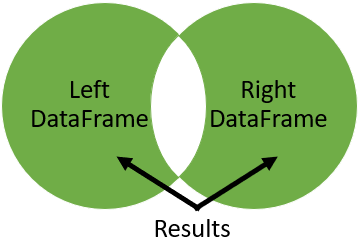

In [28]:
iron_1_actors = pd.read_csv('datasets/iron_1_actors.csv', index_col=0)
iron_2_actors = pd.read_csv('datasets/iron_2_actors.csv', index_col=0)

### Instructions
- Save to `iron_1_and_2` the merge of `iron_1_actors` (left) with `iron_2_actors` tables with an outer join on the `id` column, and set `suffixes` to `('_1','_2')`.
- Create an index that returns `True` if `name_1` or `name_2` are null, and `False` otherwise.

In [29]:
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, how = 'outer', on = 'id', suffixes=(['_1','_2']))
iron_1_and_2

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow,"Virginia ""Pepper"" Potts",Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,War Machine,18288,Terrence Howard,NaN,NaN
4,Christine Everhart,57451,Leslie Bibb,Christine Everhart,Leslie Bibb
...,...,...,...,...,...
186,NaN,92189,NaN,Party Guest (uncredited),Doug Swander
187,NaN,1265840,NaN,US Senator (uncredited),Michael A. Templeton
188,NaN,1265841,NaN,Background (uncredited),Rosa Tyabji
189,NaN,1122811,NaN,Tony Stark Usher (uncredited),Peter Sebastian Wrobel


In [30]:
m = ((iron_1_and_2['name_1'].isna()) | (iron_1_and_2['name_2'].isna())) # "|" is the "logica or" operator for non scalar

In [31]:
iron_1_and_2[m].head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,War Machine,18288,Terrence Howard,NaN,NaN
5,Raza,57452,Faran Tahir,NaN,NaN
8,Abu Bakaar,173810,Sayed Badreya,NaN,NaN


## Self join

Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The `crews` table has been loaded for you.

In [32]:
crews = pd.read_pickle('datasets/crews.p')

### Instructsion 1/3
To a variable called `crews_self_merged`, merge the `crews` table to itself on the `id` column using an inner join, setting the suffixes to `'_dir'` and `'_crew'` for the left and right tables respectively.

In [33]:
crews_self_merged = crews.merge(crews, on = 'id', suffixes=(['_dir','_crew']))
crews_self_merged

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron
...,...,...,...,...,...,...,...
834189,25975,Directing,Director,Jon Gunn,Directing,Director,Brett Winn
834190,25975,Directing,Director,Brett Winn,Production,Executive Producer,Clark Peterson
834191,25975,Directing,Director,Brett Winn,Directing,Director,Brian Herzlinger
834192,25975,Directing,Director,Brett Winn,Directing,Director,Jon Gunn


### Instructions 2/3
Create a Boolean index, named `boolean_filter`, that selects rows from the left table with the job of `'Director'` and avoids rows with the job of `'Director'` in the right table.

In [34]:
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

### Instructions 3/3
Use the `.head()` method to print the first few rows of `direct_crews`.

In [35]:
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


By merging the table to itself, you compared the value of the director from the `jobs` column to other values from the `jobs` column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.

**Pandas** treats a merge of a table to itself the same as any other merge. Therefore, it **does not limit you from chaining multiple `.merge()` methods together**.

## Index merge for movie ratings

To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

The `movies` and `ratings` tables have been loaded for you.

In [36]:
movies = pd.read_pickle('datasets/movies.p').set_index('id')
ratings = pd.read_pickle('datasets/ratings.p').set_index('id')

### Instructions
Merge `movies` and `ratings` on the index and save to a variable called `movies_ratings`, ensuring that all of the rows from the `movies` table are returned.

In [37]:
print(movies.head(2),'\n')
print('Movies shape is:',movies.shape,'\n','─' * 50)
print(ratings.head(2),'\n')
print('Ratings shape is:',ratings.shape)

                      title  popularity release_date
id                                                  
257            Oliver Twist   20.415572   2005-09-23
14290  Better Luck Tomorrow    3.877036   2002-01-12 

Movies shape is: (4803, 3) 
 ──────────────────────────────────────────────────
       vote_average  vote_count
id                             
19995           7.2     11800.0
285             6.9      4500.0 

Ratings shape is: (4803, 2)


In [38]:
movies_ratings = movies.merge(ratings, on = 'id')
movies_ratings.head()

,title,popularity,release_date,vote_average,vote_count
id,,,,,
257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
9672,Infamous,3.680896,2006-11-16,6.4,60.0
12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


Merging on indexes is just like merging on columns, so if you need to merge based on indexes, there's no need to turn the indexes into columns first.

## Do sequels earn more?

It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The `sequels` and `financials` tables have been provided.

In [39]:
# For both dataframe we need to set the index on id column. 
# Moreove for sequels dataframe we need to change the sequel column type from int, to float otherwise self join won't work
sequels = pd.read_pickle('datasets/sequels.p').set_index('id').astype({'sequel':float})
financials = pd.read_pickle('datasets/financials.p').set_index('id')

In [40]:
print(sequels.shape, financials.shape)

(4803, 2) (3229, 2)


In [41]:
# Tried to save both dataframe as CSV to do dome test on self-join
# sequels.to_csv('datasets/sequels.csv')
# financials.to_csv('datasets/financials.csv')

### ~Preparation~ **No more needed**
~As we can see, the `sequel`column has some problems because misses information.~

In [42]:
# sequels = pd.read_csv('datasets/sequels.csv', keep_default_na=True, index_col='id')
# financials = pd.read_csv('datasets/financials.csv', keep_default_na=True, index_col='id')

In [43]:
# sequels.head()

In [44]:
# financials.head()

In [45]:
# sequels = sequels.fillna(0)

In [46]:
# sequels.info()

In [47]:
# financials.info()

### Instructions 1/4
With the `sequels` table on the left, merge to it the `financials` table on index named `id`, ensuring that all the rows from the `sequels` are returned and some rows from the other table may not be returned, Save the results to `sequels_fin`.

In [48]:
sequels_fin = sequels.merge(financials, how = 'left', on = 'id')
sequels_fin.shape

(4803, 4)

In [49]:
sequels_fin.head()

,title,sequel,budget,revenue
id,,,,
19995,Avatar,NaN,237000000.0,2.787965e+09
862,Toy Story,863.0,30000000.0,3.735540e+08
863,Toy Story 2,10193.0,90000000.0,4.973669e+08
597,Titanic,NaN,200000000.0,1.845034e+09
24428,The Avengers,NaN,220000000.0,1.519558e+09


### Instructions 2/4
Merge the `sequels_fin` table to itself with an inner join, where the left and right tables merge on `sequel` and `id` respectively with suffixes equal to (`'_org','_seq'`), saving to `orig_seq`.

In [50]:
sequels_fin.head(2)

,title,sequel,budget,revenue
id,,,,
19995,Avatar,NaN,237000000.0,2.787965e+09
862,Toy Story,863.0,30000000.0,3.735540e+08


In [51]:
orig_seq = sequels_fin.merge(sequels_fin, how = 'inner', left_on= 'sequel', right_on='id', right_index = True, suffixes=(['_org','_seq']))
orig_seq.head()

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq
id,,,,,,,,,
862,863.0,Toy Story,863.0,30000000.0,373554033.0,Toy Story 2,10193.0,90000000.0,4.973669e+08
863,10193.0,Toy Story 2,10193.0,90000000.0,497366869.0,Toy Story 3,NaN,200000000.0,1.066970e+09
675,767.0,Harry Potter and the Order of the Phoenix,767.0,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,NaN,250000000.0,9.339592e+08
121,122.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,NaN,94000000.0,1.118889e+09
120,121.0,The Lord of the Rings: The Fellowship of the Ring,121.0,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,9.262874e+08


As we can see, by self joining the `sequels_fin`table is possible do a comparison between the original movie and the sequel.

In [52]:
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
orig_seq.head()

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq,diff
id,,,,,,,,,,
862,863.0,Toy Story,863.0,30000000.0,373554033.0,Toy Story 2,10193.0,90000000.0,4.973669e+08,123812836.0
863,10193.0,Toy Story 2,10193.0,90000000.0,497366869.0,Toy Story 3,NaN,200000000.0,1.066970e+09,569602834.0
675,767.0,Harry Potter and the Order of the Phoenix,767.0,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,NaN,250000000.0,9.339592e+08,-4253541.0
121,122.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,NaN,94000000.0,1.118889e+09,192601579.0
120,121.0,The Lord of the Rings: The Fellowship of the Ring,121.0,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122.0,79000000.0,9.262874e+08,54919036.0


### Instructions 3/4
Select the `title_org`, `title_seq`, and `diff` columns of orig_seq and save this as `titles_diff`.

In [53]:
titles_diff = orig_seq[['title_org','title_seq','diff']]
titles_diff.head()

,title_org,title_seq,diff
id,,,
862,Toy Story,Toy Story 2,123812836.0
863,Toy Story 2,Toy Story 3,569602834.0
675,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,-4253541.0
121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,192601579.0
120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,54919036.0


### Instructions 4/4
Sort by `titles_diff` by `diff` in descending order and print the first few rows.

In [54]:
print(titles_diff.sort_values('diff',ascending=False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.144748e+09
272        Batman Begins  The Dark Knight  6.303398e+08
10138         Iron Man 2       Iron Man 3  5.915067e+08
863          Toy Story 2      Toy Story 3  5.696028e+08
10764  Quantum of Solace          Skyfall  5.224703e+08


To complete this exercise, you needed to merge tables on their index and merge another table to itself. After the calculations were added and sub-select specific columns, the data was sorted. You found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.